<a href="https://colab.research.google.com/github/rexxar280903/Dicoding/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Kanza Az Zahrawani
- **Email:** mc315d5y1202@student.devacademy.id
- **ID Dicoding:** mc315d5y1202

## Menentukan Pertanyaan Bisnis

- pada musim apa banyak dan sedikit orang merental sepeda?
- pada cuaca apa banyak dan sedikit orang merental sepeda?


## Import Semua Packages/Library yang Digunakan

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Data Wrangling

### Gathering Data

**Insight:**
- data diambil dari website kaggle berikut [Link ke dataset di Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data?select=Readme.txt)

- pada website ini terdapat 2 file berisi data nya, namun kedunya mirip yang membedakan cuma salah satu file lebih lengkap karena membuat informasi setiap jamnya


### Assessing Data

#### import file

In [19]:
data = pd.read_csv(r"C:\Users\user\Videos\belajar\Dicoding\Dicoding\submission\dashboard\hour.csv")


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### mengecek null

In [21]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
data telah dibersihkan, sehingga tidak ada lagi kolom yang kosong 

In [22]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### cek duplikat

In [23]:
data.duplicated().sum()

np.int64(0)

### Cleaning Data

**Insight:**
- karena pada data ini tidak ada missing value maka tahap ini bisa dilewati


#### mengecek outlier

##### windspeed

{'whiskers': [<matplotlib.lines.Line2D at 0x22b86545000>,
 'caps': [<matplotlib.lines.Line2D at 0x22b86545600>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b86544e20>],
 'medians': [<matplotlib.lines.Line2D at 0x22b86545c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b86545f00>],
 'means': []}

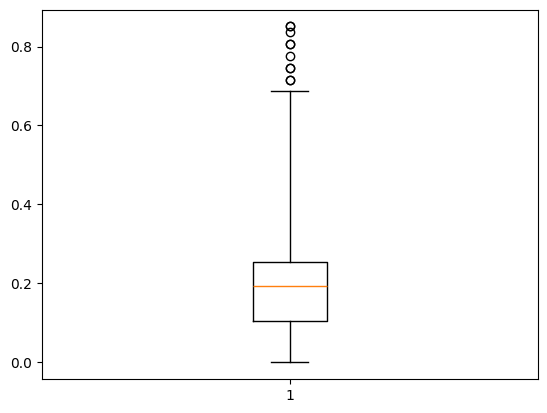

In [24]:
plt.boxplot(data['windspeed'],whis=3)

(array([2.180e+03, 6.475e+03, 4.465e+03, 2.458e+03, 1.137e+03, 4.340e+02,
        1.670e+02, 4.800e+01, 9.000e+00, 6.000e+00]),
 array([0.     , 0.08507, 0.17014, 0.25521, 0.34028, 0.42535, 0.51042,
        0.59549, 0.68056, 0.76563, 0.8507 ]),
 <BarContainer object of 10 artists>)

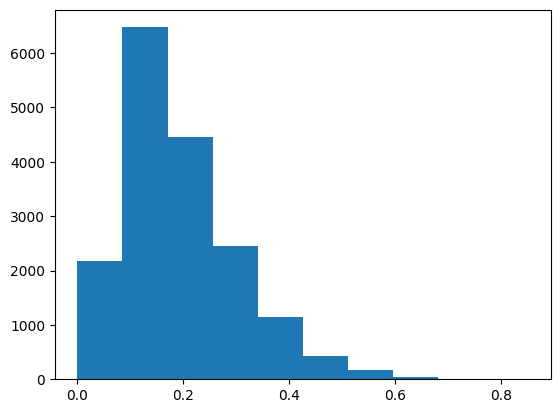

In [25]:
plt.hist(data['windspeed'])

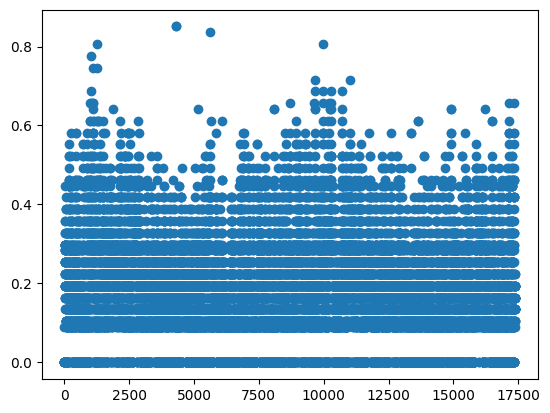

In [26]:
plt.scatter(range(len(data['windspeed'])),data['windspeed'])

#### registered

{'whiskers': [<matplotlib.lines.Line2D at 0x22b867e7160>,
 'caps': [<matplotlib.lines.Line2D at 0x22b867e7640>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b867e6e60>],
 'medians': [<matplotlib.lines.Line2D at 0x22b867e7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b867e7f40>],
 'means': []}

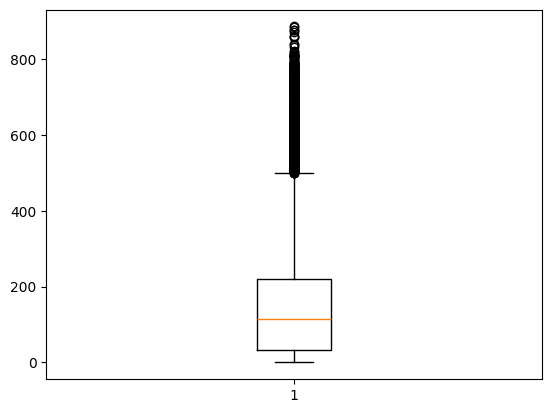

In [27]:
plt.boxplot(data['registered'])

(array([7262., 4279., 2764., 1341.,  727.,  445.,  220.,  181.,  134.,
          26.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

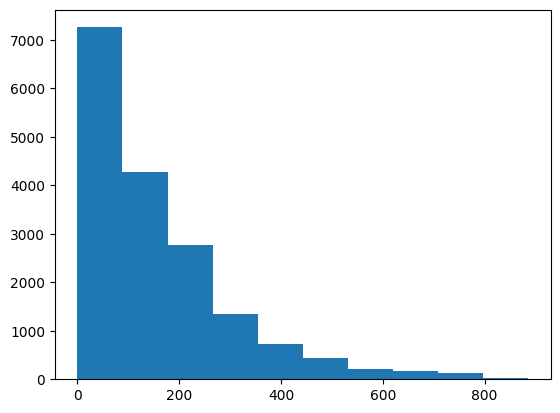

In [28]:
plt.hist(data['registered'])

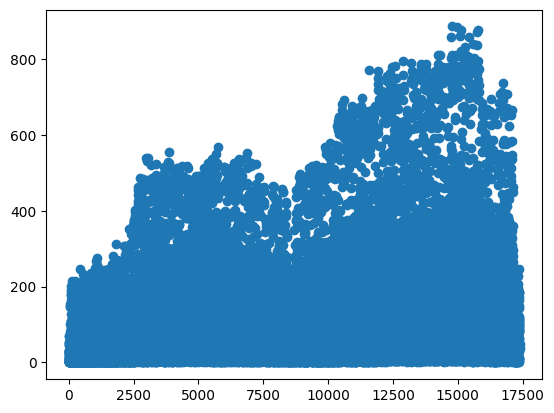

In [29]:
plt.scatter(range(len(data['registered'])), data['registered'])

#### Normalisasi data

## Exploratory Data Analysis (EDA)

### Explore analisis deskriptif peminjaman berdasarkan count

In [30]:
data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [31]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- rata-rata setiap hari perentalan sepeda itu sebanya 189 sepeda dirental, dengan sebaran data itu 181 sepeda
- minimal 1 sepedan dan maximal 977 sepeda yang merupakan outlier 
- mean itu 189 sementara median itu 142 yang menunjukkan data itu skewed right
- terlihat juga bahwa lebih banyak yang menyewa lewat registered dibanding casual 

## Visualization & Explanatory Analysis

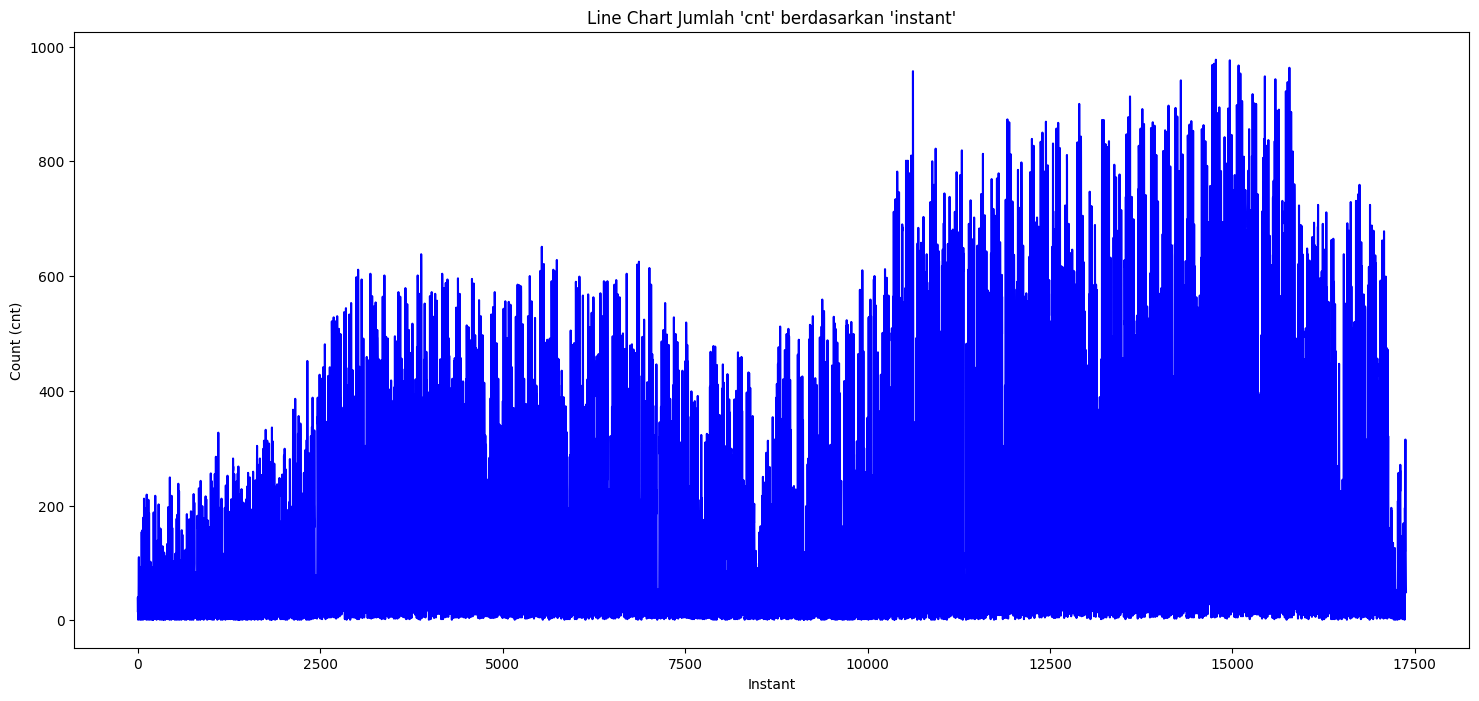

In [32]:
# Set ukuran figure sebelum memplot
plt.figure(figsize=(18, 8))

# Plot data
plt.plot(data['instant'], data['cnt'], color='b')

# Memberi judul dan label
plt.title("Line Chart Jumlah 'cnt' berdasarkan 'instant'")
plt.xlabel("Instant")
plt.ylabel("Count (cnt)")

# Menampilkan plot
plt.show()


### boxplot untuk melihat distribusi jumlah penyewaan dalam berbagai kondisi cuaca

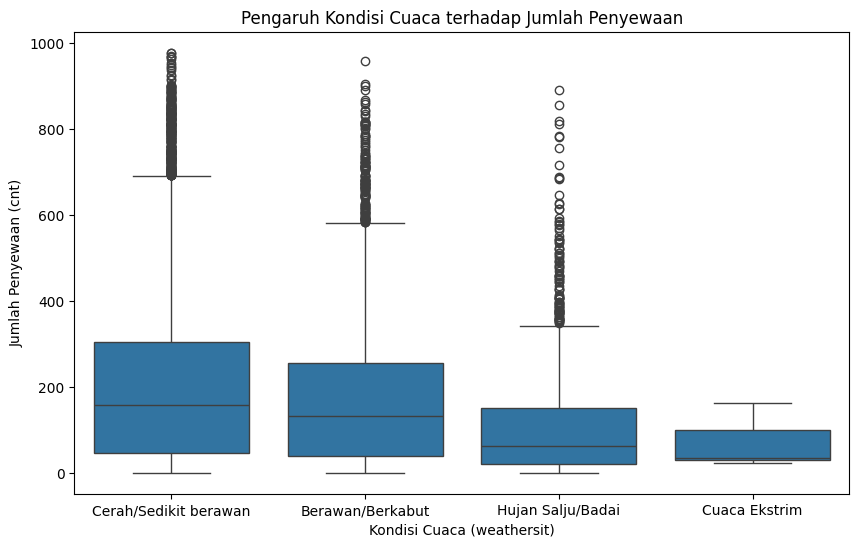

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.xticks([0, 1, 2, 3], ['Cerah/Sedikit berawan', 'Berawan/Berkabut', 'Hujan Salju/Badai', 'Cuaca Ekstrim'])
plt.show()

#### menghitung rata-rata jumlah penyewaan

In [36]:
# Menghitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca
avg_cnt_weather = data.groupby('weathersit')['cnt'].mean()

# Menampilkan rata-rata jumlah penyewaan untuk setiap kondisi cuaca
print(avg_cnt_weather)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


Insight:

- Cerah/Sedikit Berawan (weathersit = 1) memiliki rata-rata penyewaan tertinggi yaitu sekitar 194 penyewaan.
- Berawan/Berkabut (weathersit = 2) sedikit lebih rendah, dengan rata-rata sekitar 170 penyewaan.
- Hujan Salju/Badai (weathersit = 3) secara signifikan lebih rendah dengan rata-rata hanya 108 penyewaan.
- Cuaca Ekstrim (weathersit = 4) memiliki jumlah penyewaan terendah, dengan 74 penyewaan rata-rata.

### boxplot untuk distribusi penyewaan berdasarkan musim

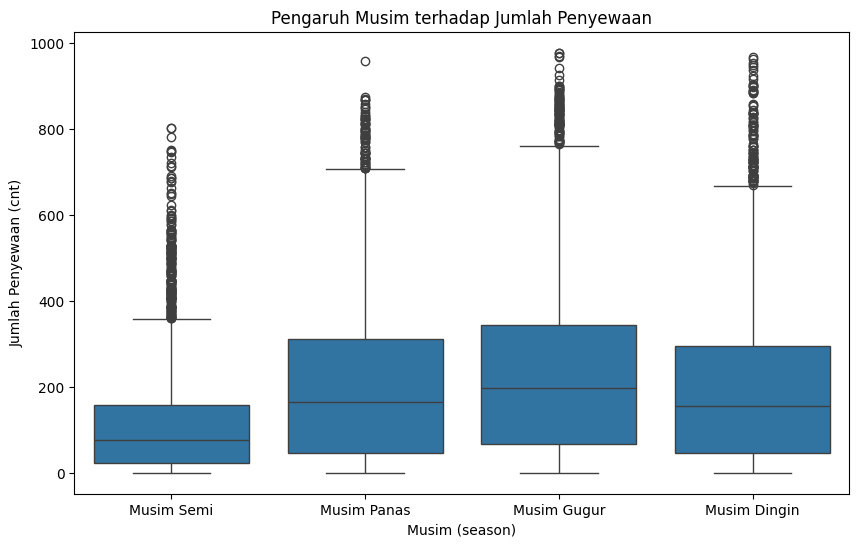

In [37]:
# Membuat boxplot untuk distribusi penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan')
plt.xlabel('Musim (season)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

In [38]:
# Menghitung rata-rata jumlah penyewaan berdasarkan musim
avg_cnt_season = data.groupby('season')['cnt'].mean()

# Menampilkan rata-rata jumlah penyewaan untuk setiap musim
print(avg_cnt_season)

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


Insight:

- Musim Gugur (season = 3) memiliki rata-rata penyewaan tertinggi yaitu sekitar 220 penyewaan.
- Musim Panas (season = 2) sedikit lebih rendah, dengan rata-rata sekitar 201 penyewaan.
- Musim Dingin (season = 4) secara signifikan lebih rendah dengan rata-rata hanya 189 penyewaan.
- Musim Semi (season = 1) memiliki jumlah penyewaan terendah, dengan 110 rata-rata penyewaan.
catatan: setelah melihat plot tren tahunan di bawah, saya merasa jika rata-rata ini ada bias dari peningkatan tahun kedua dari tahun pertama

### Aggregasi data

In [ ]:
df = pd.DataFrame(data)

# Agregasi data berdasarkan bulan (mnth)
agg_monthly = df.groupby('mnth').agg({
    'cnt': ['sum', 'mean', 'max', 'min'],
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean']
}).reset_index()

# Agregasi data berdasarkan musim (season)
agg_seasonal = df.groupby('season').agg({
    'cnt': ['sum', 'mean'],
    'temp': ['mean'],
    'hum': ['mean']
}).reset_index()

# Agregasi data berdasarkan kondisi cuaca (weathersit)
agg_weather = df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean'],
    'windspeed': ['mean'],
    'hum': ['mean']
}).reset_index()


print("Agregasi Bulanan:\n", agg_monthly)
print("\nAgregasi Musiman:\n", agg_seasonal)
print("\nAgregasi Berdasarkan Cuaca:\n", agg_weather)

Agregasi Bulanan:
    mnth     cnt                      casual            registered            
            sum        mean  max min    sum       mean        sum        mean
0     1  134933   94.424773  559   1  12042   8.426872     122891   85.997901
1     2  151352  112.865026  610   1  14963  11.158091     136389  101.706935
2     3  228920  155.410726  957   1  44444  30.172437     184476  125.238289
3     4  269094  187.260960  822   1  60802  42.311761     208292  144.949200
4     5  331686  222.907258  873   1  75285  50.594758     256401  172.312500
5     6  346342  240.515278  900   1  73906  51.323611     272436  189.191667
6     7  344948  231.819892  913   1  78157  52.524866     266791  179.295027
7     8  351194  238.097627  941   1  72039  48.840000     279155  189.257627
8     9  345991  240.773138  977   1  70323  48.937370     275668  191.835769
9    10  322352  222.158511  963   1  59760  41.185389     262592  180.973122
10   11  254831  177.335421  729   1  36603  

### Pertanyaan 1: apa pola perentalan sepeda berdasarkan cuaca?


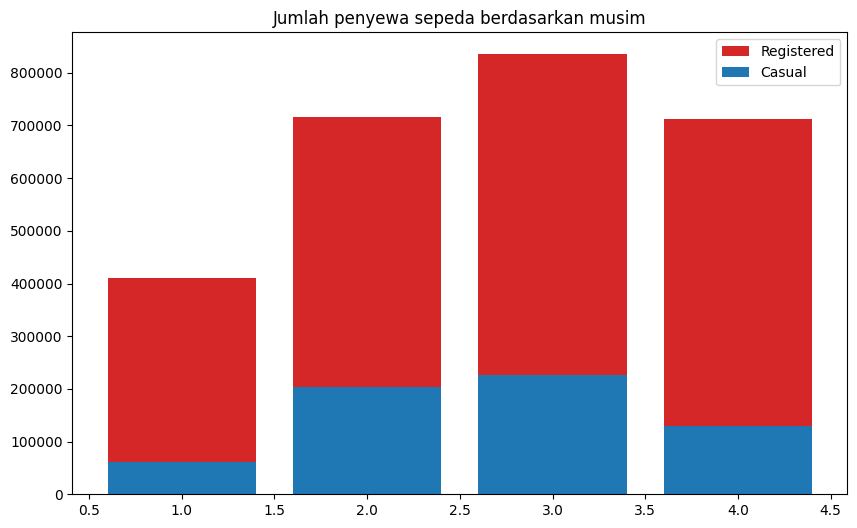

In [53]:
season_pattern = data.groupby('season')[['registered', 'casual']].sum().reset_index()

urutan_musim = ['spring', 'summer', 'fall', 'winter']

plt.figure(figsize=(10, 6))

plt.bar(
    season_pattern['season'],
    season_pattern['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    season_pattern['season'],
    season_pattern['casual'],
    label='Casual',
    color='tab:blue',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()

- insight

Pola penyewaan sepeda mengalami peningkatan bertahap setiap musim. Jumlah penyewaan sepeda paling sedikit terjadi pada musim semi. Kemudian, jumlahnya meningkat selama musim panas dan mencapai puncaknya pada musim gugur sebagai musim dengan penyewaan sepeda terbanyak. Setelah itu, jumlah penyewaan mengalami sedikit penurunan di musim dingin.

### Pertanyaan 2: - apa pola perentalan sepeda berdasarkan weekday dan holiday?



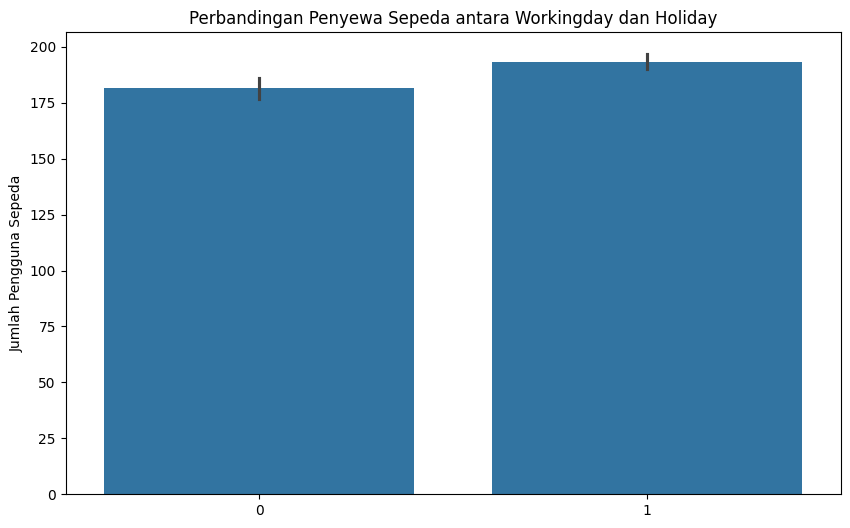

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=data)

plt.title('Perbandingan Penyewa Sepeda antara Workingday dan Holiday')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

- insight

Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa banyak orang menggunakan sepeda untuk aktivitas sehari-hari, seperti bekerja, bersekolah, berbelanja, dan keperluan lainnya.

## Analisis Lanjutan (Opsional)

### Tren Penyewaan Tahun Pertama

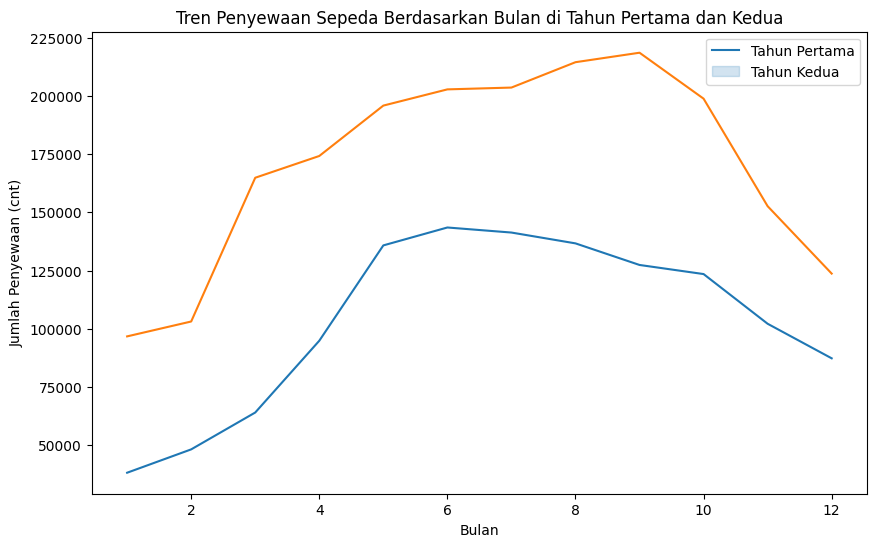

In [39]:
# Membuat data agregat untuk tren penyewaan per bulan di setiap tahun
monthly_trend = data.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Visualisasi dengan line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr')
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.legend(['Tahun Pertama', 'Tahun Kedua'])
plt.show()

Insight:

- Jumlah penyewaan sepeda pada tahun kedua secara konsisten lebih tinggi dibandingkan dengan tahun pertama.
- Pada awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus), terjadi peningkatan yang signifikan.
- Pada akhir tahun jumlah penyewaan secara konsisten menurun.

### Pengelompokan Rentang Waktu Sewa

In [42]:
# Membuat kolom baru 'rentang_waktu' berdasarkan jam
def assign_time_of_day(hr):
    if 6 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 16:
        return 'Siang'
    elif 16 <= hr < 20:
        return 'Sore'
    else:
        return 'Malam'

# Asign jam ke kategori rentang waktu
data['rentang_waktu'] = data['hr'].apply(assign_time_of_day)

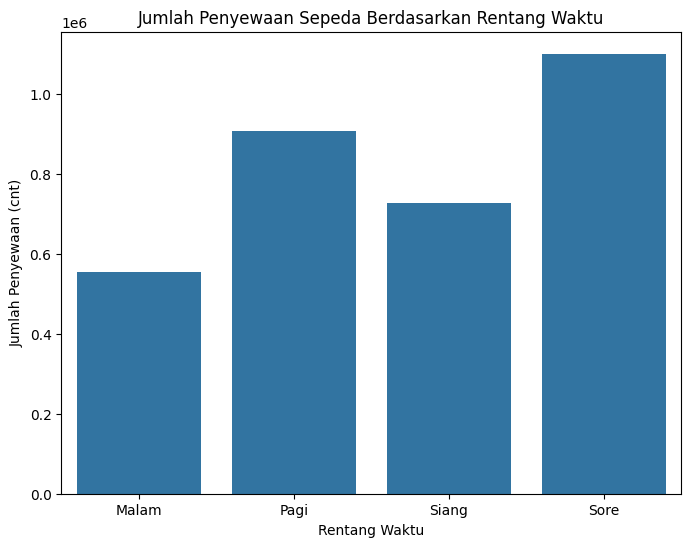

In [44]:
# Hitung jumlah penyewaan berdasarkan rentang waktu
grouped = data.groupby('rentang_waktu')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='rentang_waktu', y='cnt', data=grouped)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Rentang Waktu')
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

Insight:

- Sore hari mencatat jumlah penyewaan tertinggi, mencapai lebih dari 1 juta penyewaan.
- Pagi hari berada di posisi kedua dengan sekitar 900 ribu penyewaan.
- Siang hari memiliki jumlah penyewaan yang lebih sedikit dibandingkan pagi dan sore, dengan kurang lebih 700 ribu penyewaan.
- Malam hari menunjukkan jumlah penyewaan terendah, dengan sekitar 600 ribu penyewaan.

## Conclusion

Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim?
- Pola penyewaan sepeda mengalami peningkatan bertahap setiap musim. Jumlah penyewaan sepeda paling sedikit terjadi pada musim semi. Kemudian, jumlahnya meningkat selama musim panas dan mencapai puncaknya pada musim gugur sebagai musim dengan penyewaan sepeda terbanyak. Setelah itu, jumlah penyewaan mengalami sedikit penurunan di musim dingin.

- Pertanyaan 4: Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?
Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa banyak orang menggunakan sepeda untuk aktivitas sehari-hari, seperti bekerja, bersekolah, berbelanja, dan keperluan lainnya.



Kesimpulan dari Analisis Data Penyewaan Sepeda

- Periode Data
Data mencakup periode dari 1 Januari 2011 hingga 31 Desember 2012, dengan variabel waktu dan cuaca yang berpengaruh terhadap jumlah penyewaan sepeda.



- Rata-rata jumlah sepeda yang disewa adalah 180 sepeda per jam.
Penyewaan sepeda minimum tercatat hanya 1 sepeda, sedangkan maksimum mencapai 733 sepeda per jam.
Faktor Cuaca dan Penyewaan Sepeda

- Cuaca cerah atau sedikit berawan (weathersit = 1) memiliki rata-rata penyewaan tertinggi, yaitu 194 penyewaan per jam.
Cuaca berawan atau berkabut (weathersit = 2) memiliki rata-rata penyewaan 170 penyewaan per jam.
Hujan, salju, atau badai (weathersit = 3) secara signifikan lebih rendah, hanya 108 penyewaan per jam.
Cuaca ekstrem (weathersit = 4) memiliki penyewaan terendah, dengan rata-rata 74 penyewaan per jam.
Pola Penyewaan Berdasarkan Musim

- Musim Gugur (season = 3) memiliki rata-rata penyewaan tertinggi, yaitu 220 penyewaan per jam.
Musim Panas (season = 2) sedikit lebih rendah, dengan rata-rata 201 penyewaan per jam.
Musim Dingin (season = 4) mengalami penurunan dengan 189 penyewaan per jam.
Musim Semi (season = 1) memiliki penyewaan terendah, dengan rata-rata 110 penyewaan per jam.
Rata-rata ini kemungkinan memiliki bias karena adanya peningkatan jumlah penyewaan pada tahun kedua dibandingkan tahun pertama.
Perbandingan Tahun Pertama dan Kedua

- Tahun kedua menunjukkan jumlah penyewaan yang lebih tinggi secara konsisten dibandingkan tahun pertama.
Peningkatan signifikan terjadi pada Januari hingga Maret serta Mei hingga Agustus.
Pada akhir tahun, jumlah penyewaan mengalami penurunan secara konsisten.
Perbandingan Hari Libur dan Hari Kerja

- Penyewaan sepeda lebih tinggi pada hari kerja, menunjukkan bahwa sepeda digunakan untuk aktivitas sehari-hari seperti bekerja, sekolah, dan belanja.
Pola Penyewaan Berdasarkan Waktu dalam Sehari

- Sore hari mencatat jumlah penyewaan tertinggi, dengan lebih dari 1 juta penyewaan.
Pagi hari berada di posisi kedua, dengan sekitar 900 ribu penyewaan.
Siang hari memiliki penyewaan lebih sedikit, sekitar 700 ribu penyewaan.
Malam hari menunjukkan jumlah penyewaan terendah, sekitar 600 ribu penyewaan.
Kesimpulan ini menunjukkan bahwa penyewaan sepeda sangat dipengaruhi oleh faktor musiman, kondisi cuaca, waktu dalam sehari, serta tren peningkatan penggunaan sepeda dari tahun ke tahun.